# Applying KNN Regression on given dataset

In [1]:
# Importing all required Libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
# reading test and train data with pandas 

df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [3]:
# observing the data  
df_train.head()

,data1,data2,data3,data4,data5,data6,data7,data8,data9,data10,output
0,8,279,C,14.451155,1139.0,1.0,9.302908,1.0,M,p,86.108947
1,1,108,H,14.207448,1656.0,1.0,7.220130,0.0,M,p,42.606833
2,8,258,A,19.220830,2817.0,1.0,8.727214,1.0,M,p,85.625961
3,4,147,A,15.752732,1948.0,1.0,6.078818,1.0,M,p,53.656277
4,5,230,H,10.195407,1336.0,1.0,4.749185,0.0,M,p,64.925051


In [4]:
df_train.tail()

,data1,data2,data3,data4,data5,data6,data7,data8,data9,data10,output
9995,9,263,A,16.604215,1070.0,0.0,8.979149,2.0,F,p,85.922943
9996,5,280,E,28.758911,2652.0,0.0,3.574129,0.0,F,p,90.857149
9997,6,188,D,15.963267,1359.0,0.0,2.880019,0.0,F,p,61.246960
9998,1,132,H,11.683401,1793.0,0.0,6.983192,2.0,F,p,45.298253
9999,5,264,A,21.176115,1792.0,0.0,8.276101,2.0,F,p,85.534604


In [5]:
df_test.head()

,data1,data2,data3,data4,data5,data6,data7,data8,data9,data10
0,7,195,A,29.038043,2725,1,6.145731,2,M,p
1,9,109,F,20.221431,1184,1,9.334184,2,M,p
2,0,126,C,26.477532,2975,1,9.021806,1,M,p
3,2,209,E,13.445450,1067,1,1.814993,0,M,p
4,5,268,B,25.065894,1336,1,1.639130,1,M,p


In [6]:
df_test.tail()

,data1,data2,data3,data4,data5,data6,data7,data8,data9,data10
9995,7,251,D,23.004384,1637,0,8.333728,1,F,p
9996,5,275,A,29.514058,2339,0,9.953107,1,F,p
9997,8,168,C,22.520965,1827,0,7.555553,1,F,p
9998,4,296,E,16.558948,1748,0,8.846995,1,F,p
9999,7,281,C,18.546089,1651,0,8.907220,2,F,p


In [7]:
df_train.describe()

,data1,data2,data4,data5,data6,data7,data8,output
count,10000.000000,10000.000000,10000.000000,9999.000000,9997.000000,9998.000000,9999.000000,9999.000000
mean,4.500200,199.937000,19.980069,1999.994099,0.499850,5.032647,0.989699,67.641293
std,3.468602,57.637745,5.790647,575.293177,0.500025,2.882390,0.812112,13.373996
min,0.000000,100.000000,0.000000,4.000000,0.000000,0.001195,0.000000,30.857090
25%,2.000000,149.000000,14.928790,1505.000000,0.000000,2.541841,0.000000,57.393568
50%,4.000000,201.000000,20.000361,1999.000000,0.000000,5.008526,1.000000,67.877814
75%,7.000000,250.000000,24.979557,2490.000000,1.000000,7.520097,2.000000,77.831703
max,200.000000,299.000000,70.002000,2999.000000,1.000000,9.999848,2.000000,103.809450


In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   data1   10000 non-null  int64  
 1   data2   10000 non-null  int64  
 2   data3   10000 non-null  object 
 3   data4   10000 non-null  float64
 4   data5   9999 non-null   float64
 5   data6   9997 non-null   float64
 6   data7   9998 non-null   float64
 7   data8   9999 non-null   float64
 8   data9   9999 non-null   object 
 9   data10  9999 non-null   object 
 10  output  9999 non-null   float64
dtypes: float64(6), int64(2), object(3)
memory usage: 859.5+ KB


In [9]:
df_train.isnull().sum()

data1     0
data2     0
data3     0
data4     0
data5     1
data6     3
data7     2
data8     1
data9     1
data10    1
output    1
dtype: int64

In [10]:
df_train[df_train['data5'].isnull()]

,data1,data2,data3,data4,data5,data6,data7,data8,data9,data10,output
175,0,157,H,13.140898,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df_train[df_train['data6'].isnull()]

,data1,data2,data3,data4,data5,data6,data7,data8,data9,data10,output
40,0,128,E,29.546179,2181.0,NaN,NaN,2.0,M,p,57.219083
43,2,219,A,25.589476,1539.0,NaN,7.085797,2.0,M,p,75.916325
175,0,157,H,13.140898,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df_train[df_train['data7'].isnull()]

,data1,data2,data3,data4,data5,data6,data7,data8,data9,data10,output
40,0,128,E,29.546179,2181.0,NaN,NaN,2.0,M,p,57.219083
175,0,157,H,13.140898,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
df_train[df_train['data8'].isnull()]

,data1,data2,data3,data4,data5,data6,data7,data8,data9,data10,output
175,0,157,H,13.140898,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
df_train[df_train['data9'].isnull()]

,data1,data2,data3,data4,data5,data6,data7,data8,data9,data10,output
175,0,157,H,13.140898,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
df_train[df_train['data10'].isnull()]

,data1,data2,data3,data4,data5,data6,data7,data8,data9,data10,output
175,0,157,H,13.140898,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Replacing the missing vales with mean with the help of for loop 

In [16]:
columns_with_null_values = ['data5','data6','data7','data8','output']

for column in columns_with_null_values:
    df_train[column] = df_train[column].replace(0, np.NaN)
    mean = int(df_train[column].mean(skipna=True))
    df_train[column] = df_train[column].replace(np.NaN ,mean)

In [17]:
df_train.isnull().sum()

data1     0
data2     0
data3     0
data4     0
data5     0
data6     0
data7     0
data8     0
data9     1
data10    1
output    0
dtype: int64

In [18]:
# droping nan  values  
# on train dataset 
df_train.dropna(axis = 0, inplace = True)


# on test dataset 
df_test.dropna(axis = 0, inplace = True)

In [19]:
df_train.isnull().sum()

data1     0
data2     0
data3     0
data4     0
data5     0
data6     0
data7     0
data8     0
data9     0
data10    0
output    0
dtype: int64

In [20]:
df_test.isnull().sum()

data1     0
data2     0
data3     0
data4     0
data5     0
data6     0
data7     0
data8     0
data9     0
data10    0
dtype: int64

In [21]:
# droping data10 because it doesnot contain valuable information

#  for train dataset 
df_train.drop('data10', axis = 1 ,inplace =  True)
df_train.head()


,data1,data2,data3,data4,data5,data6,data7,data8,data9,output
0,8,279,C,14.451155,1139.0,1.0,9.302908,1.0,M,86.108947
1,1,108,H,14.207448,1656.0,1.0,7.220130,1.0,M,42.606833
2,8,258,A,19.220830,2817.0,1.0,8.727214,1.0,M,85.625961
3,4,147,A,15.752732,1948.0,1.0,6.078818,1.0,M,53.656277
4,5,230,H,10.195407,1336.0,1.0,4.749185,1.0,M,64.925051


In [22]:
#  converting catagorical data to numerical data 
df_train['data3'].unique()

array(['C', 'H', 'A', 'F', 'B', 'G', 'E', 'D'], dtype=object)

In [23]:
df_train['data9'].unique()

array(['M', 'F'], dtype=object)

In [24]:
from sklearn import preprocessing 

# creating label encoder object
LE = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 

# training dataset
df_train['data3']= LE.fit_transform(df_train['data3']) 
df_train['data9']= LE.fit_transform(df_train['data9'])

   
#testing dataset
df_test['data3']= LE.fit_transform(df_test['data3']) 
df_test['data9']= LE.fit_transform(df_test['data9'])



In [25]:
df_train.head()

,data1,data2,data3,data4,data5,data6,data7,data8,data9,output
0,8,279,2,14.451155,1139.0,1.0,9.302908,1.0,1,86.108947
1,1,108,7,14.207448,1656.0,1.0,7.220130,1.0,1,42.606833
2,8,258,0,19.220830,2817.0,1.0,8.727214,1.0,1,85.625961
3,4,147,0,15.752732,1948.0,1.0,6.078818,1.0,1,53.656277
4,5,230,7,10.195407,1336.0,1.0,4.749185,1.0,1,64.925051


In [26]:
df_test.head()

,data1,data2,data3,data4,data5,data6,data7,data8,data9,data10
0,7,195,0,29.038043,2725,1,6.145731,2,1,p
1,9,109,5,20.221431,1184,1,9.334184,2,1,p
2,0,126,2,26.477532,2975,1,9.021806,1,1,p
3,2,209,4,13.445450,1067,1,1.814993,0,1,p
4,5,268,1,25.065894,1336,1,1.639130,1,1,p


In [27]:
#Checking for null values

np.any(np.isnan(df_train))

False

In [28]:
# detecting outliers and removing it 

import seaborn as sns

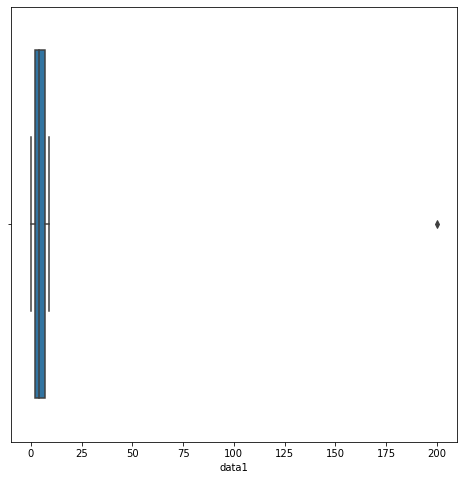

In [29]:
# data1 
plt.figure(figsize = (8,8))
sns.boxplot(df_train['data1'] )

In [30]:
#  one outlier is found in data1 therefore we have to  remove it
i = df_train.loc[df_train['data1'] > 50].index
print(i)
df_train.drop(i, inplace = True)

Int64Index([18], dtype='int64')


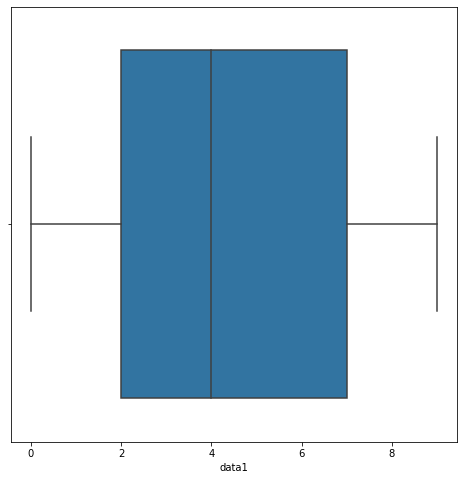

In [31]:
#  we can check that outlier is removed 
plt.figure(figsize = (8,8))
sns.boxplot(df_train['data1'] )

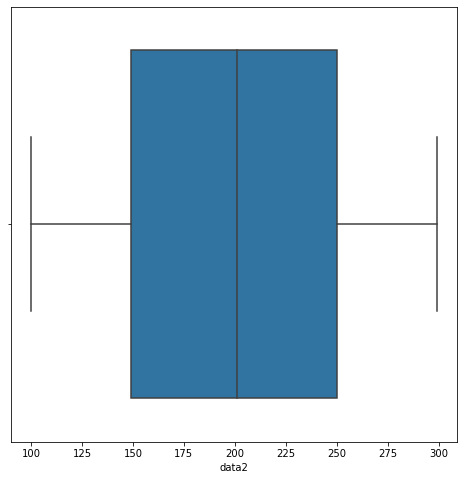

In [32]:
# data2 
plt.figure(figsize = (8,8))
sns.boxplot(df_train['data2'] )

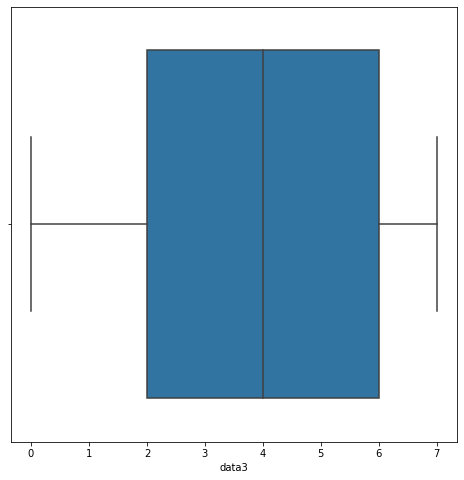

In [33]:
# data3
plt.figure(figsize = (8,8))
sns.boxplot(df_train['data3'] )

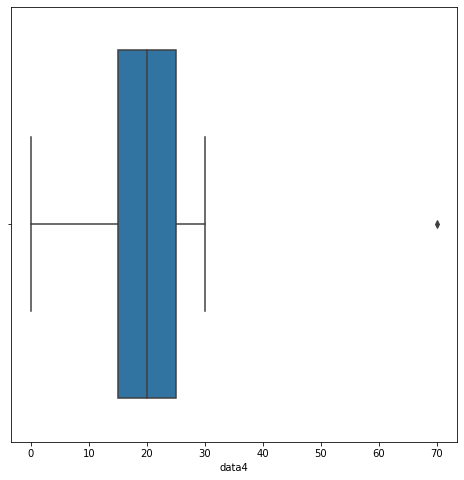

In [34]:
# data4
plt.figure(figsize = (8,8))
sns.boxplot(df_train['data4'] )

In [35]:
#  two outliers are found in data4 therefore we have to  remove it
i = df_train.loc[df_train['data4'] > 50].index
print(i)
df_train.drop(i, inplace = True)

i = df_train.loc[df_train['data4'] < 10].index
print(i)
df_train.drop(i, inplace = True)

Int64Index([33], dtype='int64')
Int64Index([81], dtype='int64')


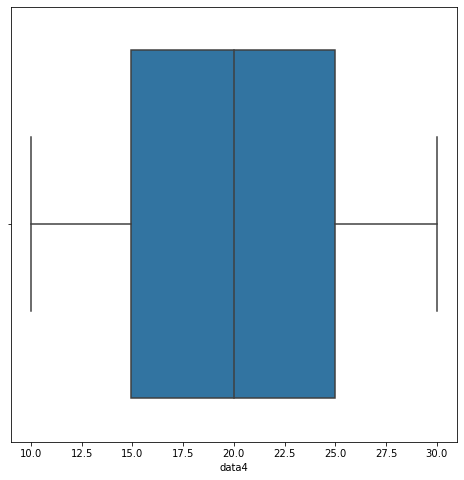

In [36]:
#  check if it is removed or not 
plt.figure(figsize = (8,8))
sns.boxplot(df_train['data4'] )

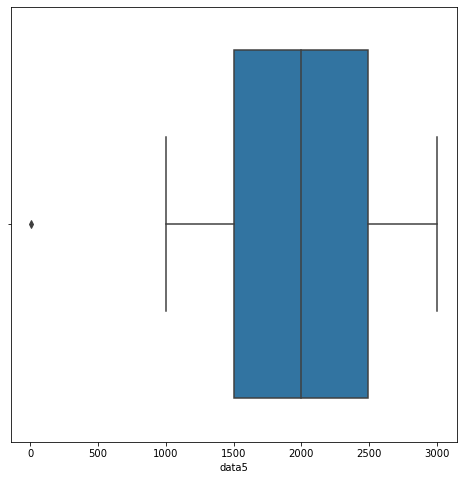

In [37]:
# data5
plt.figure(figsize = (8,8))
sns.boxplot(df_train['data5'] )

In [38]:
#  one outlier is found in data5 therefore we have to  remove it
i = df_train.loc[df_train['data5'] < 700].index
print(i)
df_train.drop(i, inplace = True)

Int64Index([46], dtype='int64')


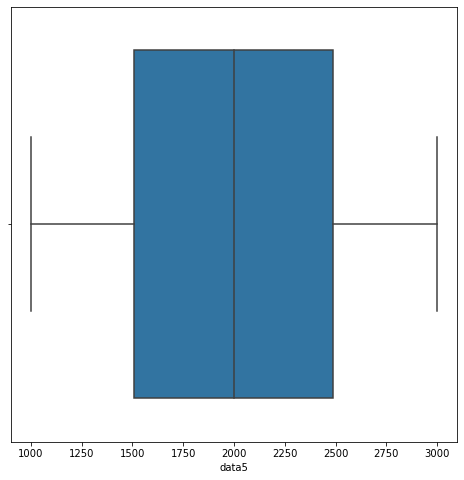

In [39]:
plt.figure(figsize = (8,8))
sns.boxplot(df_train['data5'] )

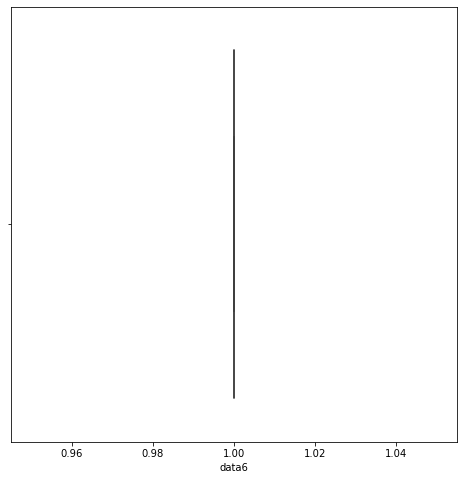

In [40]:
plt.figure(figsize = (8,8))
sns.boxplot(df_train['data6'] )

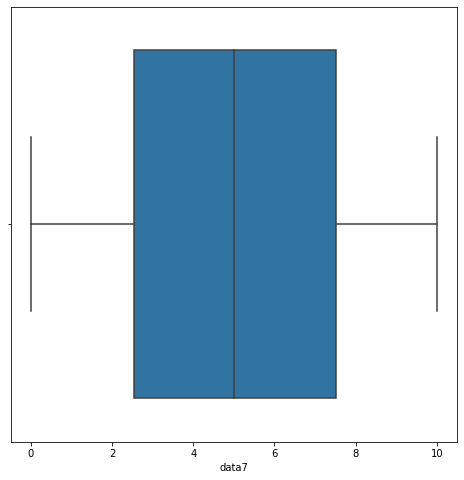

In [41]:
plt.figure(figsize = (8,8))
sns.boxplot(df_train['data7'] )

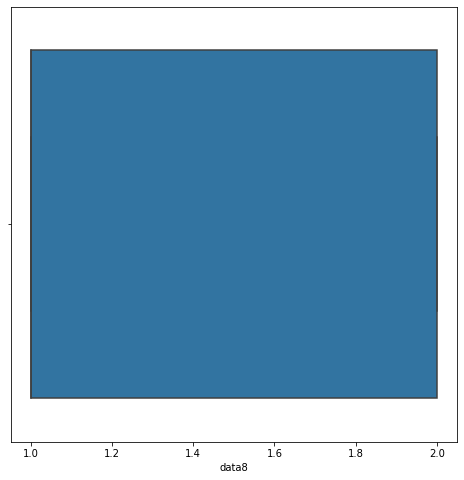

In [42]:
plt.figure(figsize = (8,8))
sns.boxplot(df_train['data8'] )

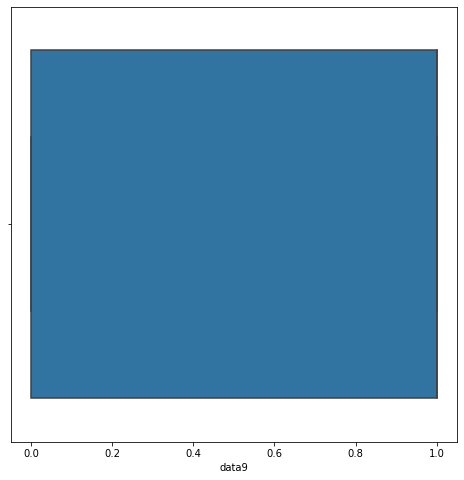

In [43]:
plt.figure(figsize = (8,8))
sns.boxplot(df_train['data9'] )

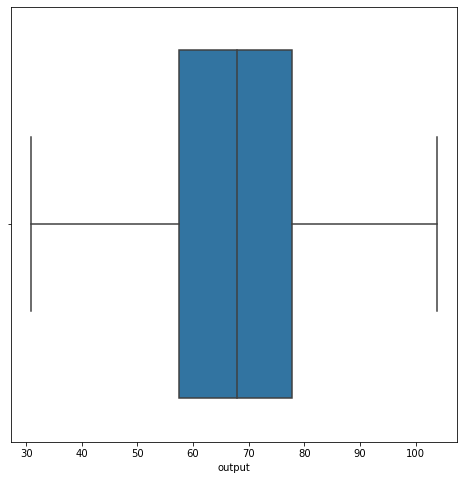

In [44]:
plt.figure(figsize = (8,8))
sns.boxplot(df_train['output'] )

In [45]:
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

In [46]:
X = df_train.drop(['output'], axis = 1, inplace = False)
y = df_train['output']

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state = 10)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(7496, 9) (2499, 9) (7496,) (2499,)


In [48]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [49]:
y_pred = regressor.predict(X_test)
df_predict = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_predict

,Actual,Predicted
942,80.829102,80.829102
4519,81.090249,81.090249
3653,77.292187,77.292187
197,68.697806,68.697806
8079,74.962615,74.962615
...,...,...
3694,69.297951,69.297951
4225,63.167783,63.167783
5118,80.154109,80.154109
6891,51.129944,51.129944


In [50]:
r2_score(y_test, y_pred)

0.9999999983141522

In [51]:
from sklearn.neighbors import KNeighborsRegressor

In [52]:
knn = KNeighborsRegressor(n_neighbors=9)
knn.fit(X_train,y_train)


KNeighborsRegressor(n_neighbors=9)

In [53]:
y_pred = knn.predict(X_test)
df_predict = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_predict

,Actual,Predicted
942,80.829102,75.160475
4519,81.090249,79.105500
3653,77.292187,86.531384
197,68.697806,72.807772
8079,74.962615,79.722060
...,...,...
3694,69.297951,71.823756
4225,63.167783,64.712934
5118,80.154109,87.645388
6891,51.129944,52.089296


In [54]:
r2_score(y_test, y_pred)

0.8353110522132985